Name: Youssef Salem Hassan

# **EDA project**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [48]:
data = pd.read_csv('raw.csv')
data

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
0,1.0,1.0,1.0,Atlanta,2.0,7.0,38.0,Y,33.75515,-84.32992,...,5306.0,75,1.413494,104.743243,35.280702,4.944444,1.459459,1.845070,2.146667,2.146667
1,1.0,1.0,1.0,Atlanta,2.0,15.0,38.0,N,33.82613,-84.33963,...,10537.2,96,0.911058,103.673684,21.169231,4.847458,1.281250,1.473118,1.687500,1.687500
2,2.0,2.0,2.0,Atlanta,4.0,17.0,100.0,Y,33.75076,-84.37058,...,9114.4,200,2.194330,119.368687,40.400000,4.937500,1.375000,1.602094,1.925000,1.925000
3,1.0,1.0,1.0,Atlanta,2.0,304.0,78.0,Y,33.77059,-84.33538,...,7808.0,130,1.664959,119.914729,44.063158,4.892857,1.292308,1.603306,1.953846,1.953846
4,1.0,1.0,1.0,Atlanta,2.0,19.0,50.0,Y,33.79030,-84.40027,...,9343.6,190,2.033477,131.058511,28.444444,4.881679,1.326316,1.580838,1.968421,1.968421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33140,1.0,1.0,2.0,Washington,5.0,159.0,67.0,N,38.90956,-77.03107,...,5300.0,123,2.320755,135.268293,52.009174,4.800000,1.262295,1.453704,2.203252,2.203252
33141,2.0,1.0,4.0,Washington,1.0,28.0,49.0,Y,38.90920,-77.02622,...,5300.0,123,2.320755,135.268293,52.009174,4.800000,1.262295,1.453704,2.203252,2.203252
33142,1.0,1.0,1.0,Washington,2.0,106.0,120.0,Y,38.88746,-76.99119,...,11794.8,410,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805
33143,1.0,1.0,2.0,Washington,3.0,296.0,70.0,Y,38.88535,-76.98183,...,11794.8,410,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33145 entries, 0 to 33144
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Bathrooms                                           32697 non-null  float64
 1   Bedrooms                                            29818 non-null  float64
 2   Beds                                                32831 non-null  float64
 3   LocationName                                        32826 non-null  object 
 4   NumGuests                                           32831 non-null  float64
 5   NumReviews                                          32829 non-null  float64
 6   Price                                               32507 non-null  float64
 7   Rating                                              33145 non-null  object 
 8   latitude                                            33145 non-null  float64


In [50]:
display(data.head())

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
0,1.0,1.0,1.0,Atlanta,2.0,7.0,38.0,Y,33.75515,-84.32992,...,5306.0,75,1.413494,104.743243,35.280702,4.944444,1.459459,1.845070,2.146667,2.146667
1,1.0,1.0,1.0,Atlanta,2.0,15.0,38.0,N,33.82613,-84.33963,...,10537.2,96,0.911058,103.673684,21.169231,4.847458,1.281250,1.473118,1.687500,1.687500
2,2.0,2.0,2.0,Atlanta,4.0,17.0,100.0,Y,33.75076,-84.37058,...,9114.4,200,2.194330,119.368687,40.400000,4.937500,1.375000,1.602094,1.925000,1.925000
3,1.0,1.0,1.0,Atlanta,2.0,304.0,78.0,Y,33.77059,-84.33538,...,7808.0,130,1.664959,119.914729,44.063158,4.892857,1.292308,1.603306,1.953846,1.953846
4,1.0,1.0,1.0,Atlanta,2.0,19.0,50.0,Y,33.79030,-84.40027,...,9343.6,190,2.033477,131.058511,28.444444,4.881679,1.326316,1.580838,1.968421,1.968421


In [51]:
display(data.describe())

,Bathrooms,Bedrooms,Beds,NumGuests,NumReviews,Price,latitude,longitude,zipcode,pop2016,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
count,32697.000000,29818.000000,32831.000000,32831.000000,32829.000000,32507.000000,33145.000000,33145.000000,33145.000000,33103.000000,...,33103.000000,33145.000000,33103.000000,33145.000000,33145.000000,33145.000000,33145.000000,33145.000000,33145.000000,33145.000000
mean,1.215891,1.474479,1.940148,3.528373,51.086296,117.885071,36.700842,-97.464214,57754.753990,34018.967163,...,13607.586865,739.072077,36.405024,126.129854,49.056798,4.819490,1.236122,1.500675,1.952938,1.952938
std,0.547114,0.839045,1.421961,2.260288,62.151818,97.025832,5.198376,21.231474,36716.353574,22522.663845,...,9009.065538,1167.458959,96.259056,38.451543,16.486948,0.069848,0.131183,0.226741,0.356269,0.356269
min,0.000000,1.000000,0.000000,1.000000,2.000000,10.000000,25.452690,-122.544590,2108.000000,69.000000,...,27.600000,1.000000,0.003440,16.000000,4.000000,4.250000,0.344828,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,11.000000,63.000000,32.749120,-122.259300,19147.000000,15504.000000,...,6201.600000,114.000000,0.805234,102.277778,38.602771,4.781250,1.178295,1.376812,1.732456,1.732456
50%,1.000000,1.000000,1.000000,3.000000,28.000000,90.000000,37.796110,-90.079520,70118.000000,33392.000000,...,13356.800000,284.000000,2.234994,117.697403,46.406699,4.835329,1.223011,1.461605,1.902098,1.902098
75%,1.000000,2.000000,2.000000,4.000000,67.000000,139.000000,40.647290,-75.181480,94112.000000,45420.000000,...,18168.000000,703.000000,5.538630,145.340708,57.070000,4.869565,1.317597,1.600000,2.145043,2.145043
max,9.000000,10.000000,20.000000,16.000000,1099.000000,999.000000,47.742760,-70.983350,98177.000000,114602.000000,...,45840.800000,4143.000000,330.488194,347.000000,206.000000,5.000000,3.043478,3.333333,6.000000,6.000000


----------------------------------------------

(1) (5 marks) Propose 4 questions (non-predictive and non-trivial) that you believe are interesting to
explore and can be answered using the provided dataset (at least 3 question should be answered using
hypothesis test). Briefly describe why you think those questions are interesting to whom. You can
answer this question in a markdown cell of your ipynb file.

1. Is there a relationship between the average price of Airbnb listings in the same location and the median household income?

   Why is it interesting? Investors may find this useful in understanding how economic issues affect pricing.

2. Is the average price of real estate higher in densely populated areas?

   Why is it interesting? Travelers may find this information useful in understanding the price differences between less populated and more inhabited urban areas.

3. Does the daily cost have a substantial correlation with the number of bedrooms?
   
   Why is it interesting? For prospective hosts who wish to tailor their pricing strategy according to the size of their house, this is helpful.

4. Do regions with lower unemployment rates have a larger percentage of 5-star listings?

In [55]:
missing_count = data.isnull().sum()
missing_percentage = (missing_count / len(data)) * 100

missing_summary = pd.DataFrame({
    'Missing count': missing_count,
    'Missing percentage': missing_percentage
})
print(missing_summary)

                                                    Missing count  \
Bathrooms                                                     448   
Bedrooms                                                     3327   
Beds                                                          314   
LocationName                                                  319   
NumGuests                                                     314   
NumReviews                                                    316   
Price                                                         638   
Rating                                                          0   
latitude                                                        0   
longitude                                                       0   
zipcode                                                         0   
pop2016                                                        42   
pop2010                                                        42   
pop2000                           

-----------------------------------------

(2) (15 marks) Analyze the quality of data (all columns) and report statistics of missing data and their
missing mechanism and why did you choose this mechanism, and how will handle these nulls (there’s
no one true solution but you must explain your reasons in a separate markdown and you must
missingno package to support your claims), the report must answer the following questions

### 2.1 does missing value exit in the table?

*   The dataset does indeed have missing values in a few of its columns.



### 2.2 Where are the missing data?

* House-specific columns like Bathrooms, Bedrooms, Beds, LocationName, Number of Guests, and Number of Reviews are missing data.

* characteristics of the economy and population, such as median taxes, median house value, prop taxes paid in 2016, pop2016, and pop2010.

* The number of homes and the density of Airbnbs by zipcode are two aggregated Airbnb features with a minor amount of missing data.

### 2.3 How much data is missing?

*   Each column has a different percentage of missing data:
At about 10.92%, median taxes (with mortgage) is the column with the largest percentage of missing data.

*   Missing percentages range from 1% to 2% in columns such as Price, Bathrooms, and Prop Taxes Paid in 2016.

* Missing data is absent from the majority of aggregated Airbnb features (Average Abnb Price, etc.).


### 2.4 Are there any variables often missing together？

* Patterns of missing data may be revealed via a more thorough correlation study (using programs like Missingno's heatmap).

   
*    For example, the median taxes with and without mortgages show comparable missing percentages, which suggests that these statistics are missing collectively.

* Patterns may be shared by bedrooms, median home value, and other economic indicators, indicating that missing values may be associated with particular zip codes or listings.

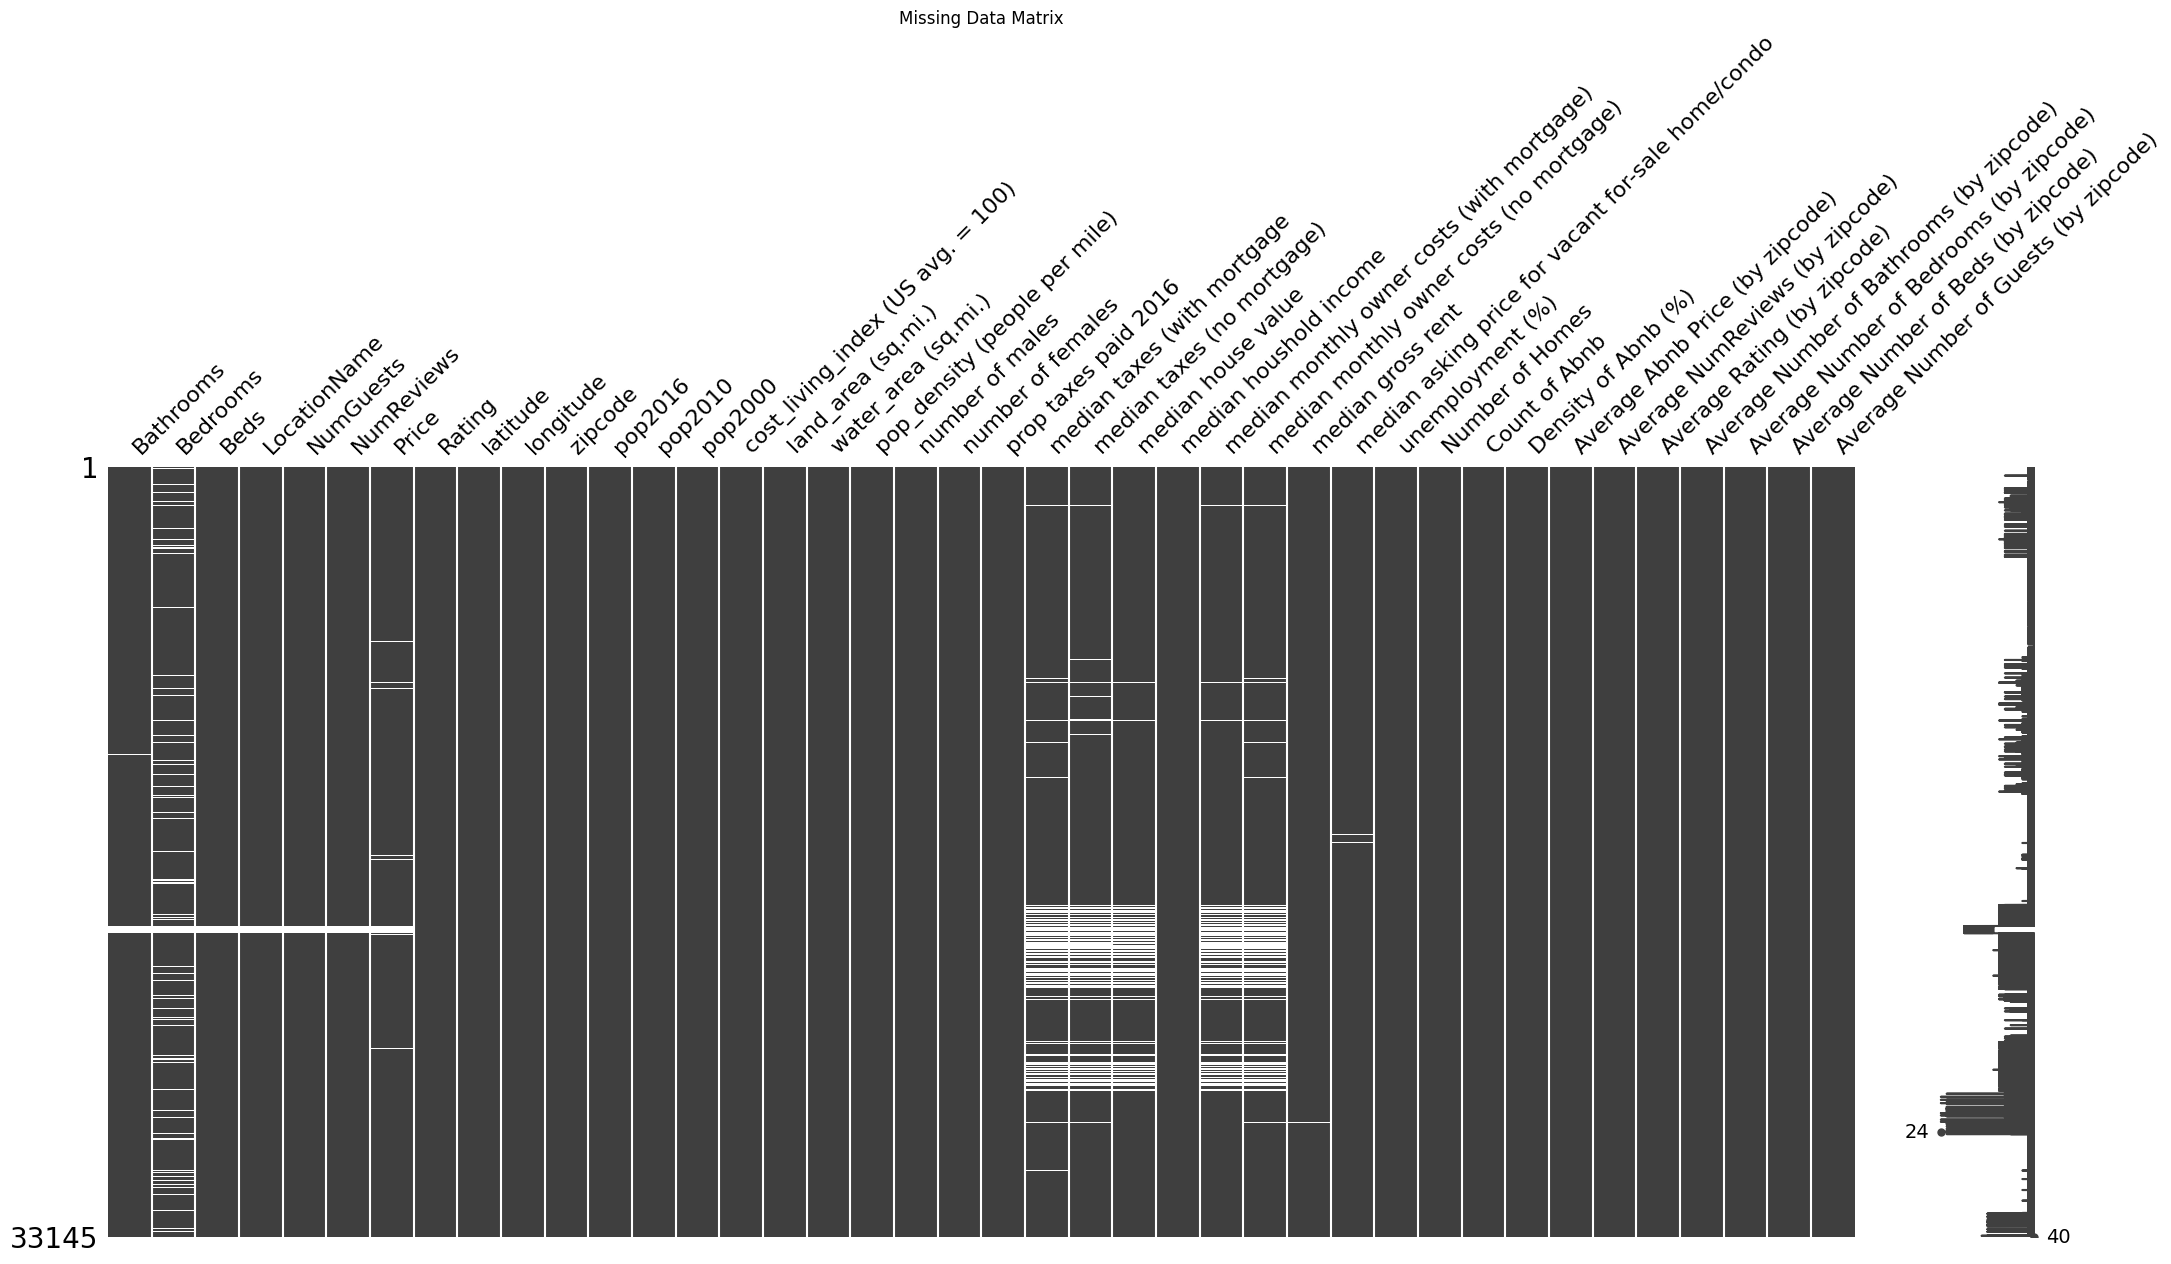

In [56]:
# Visualize missing data
msno.matrix(data)
plt.title("Missing Data Matrix")
plt.show()

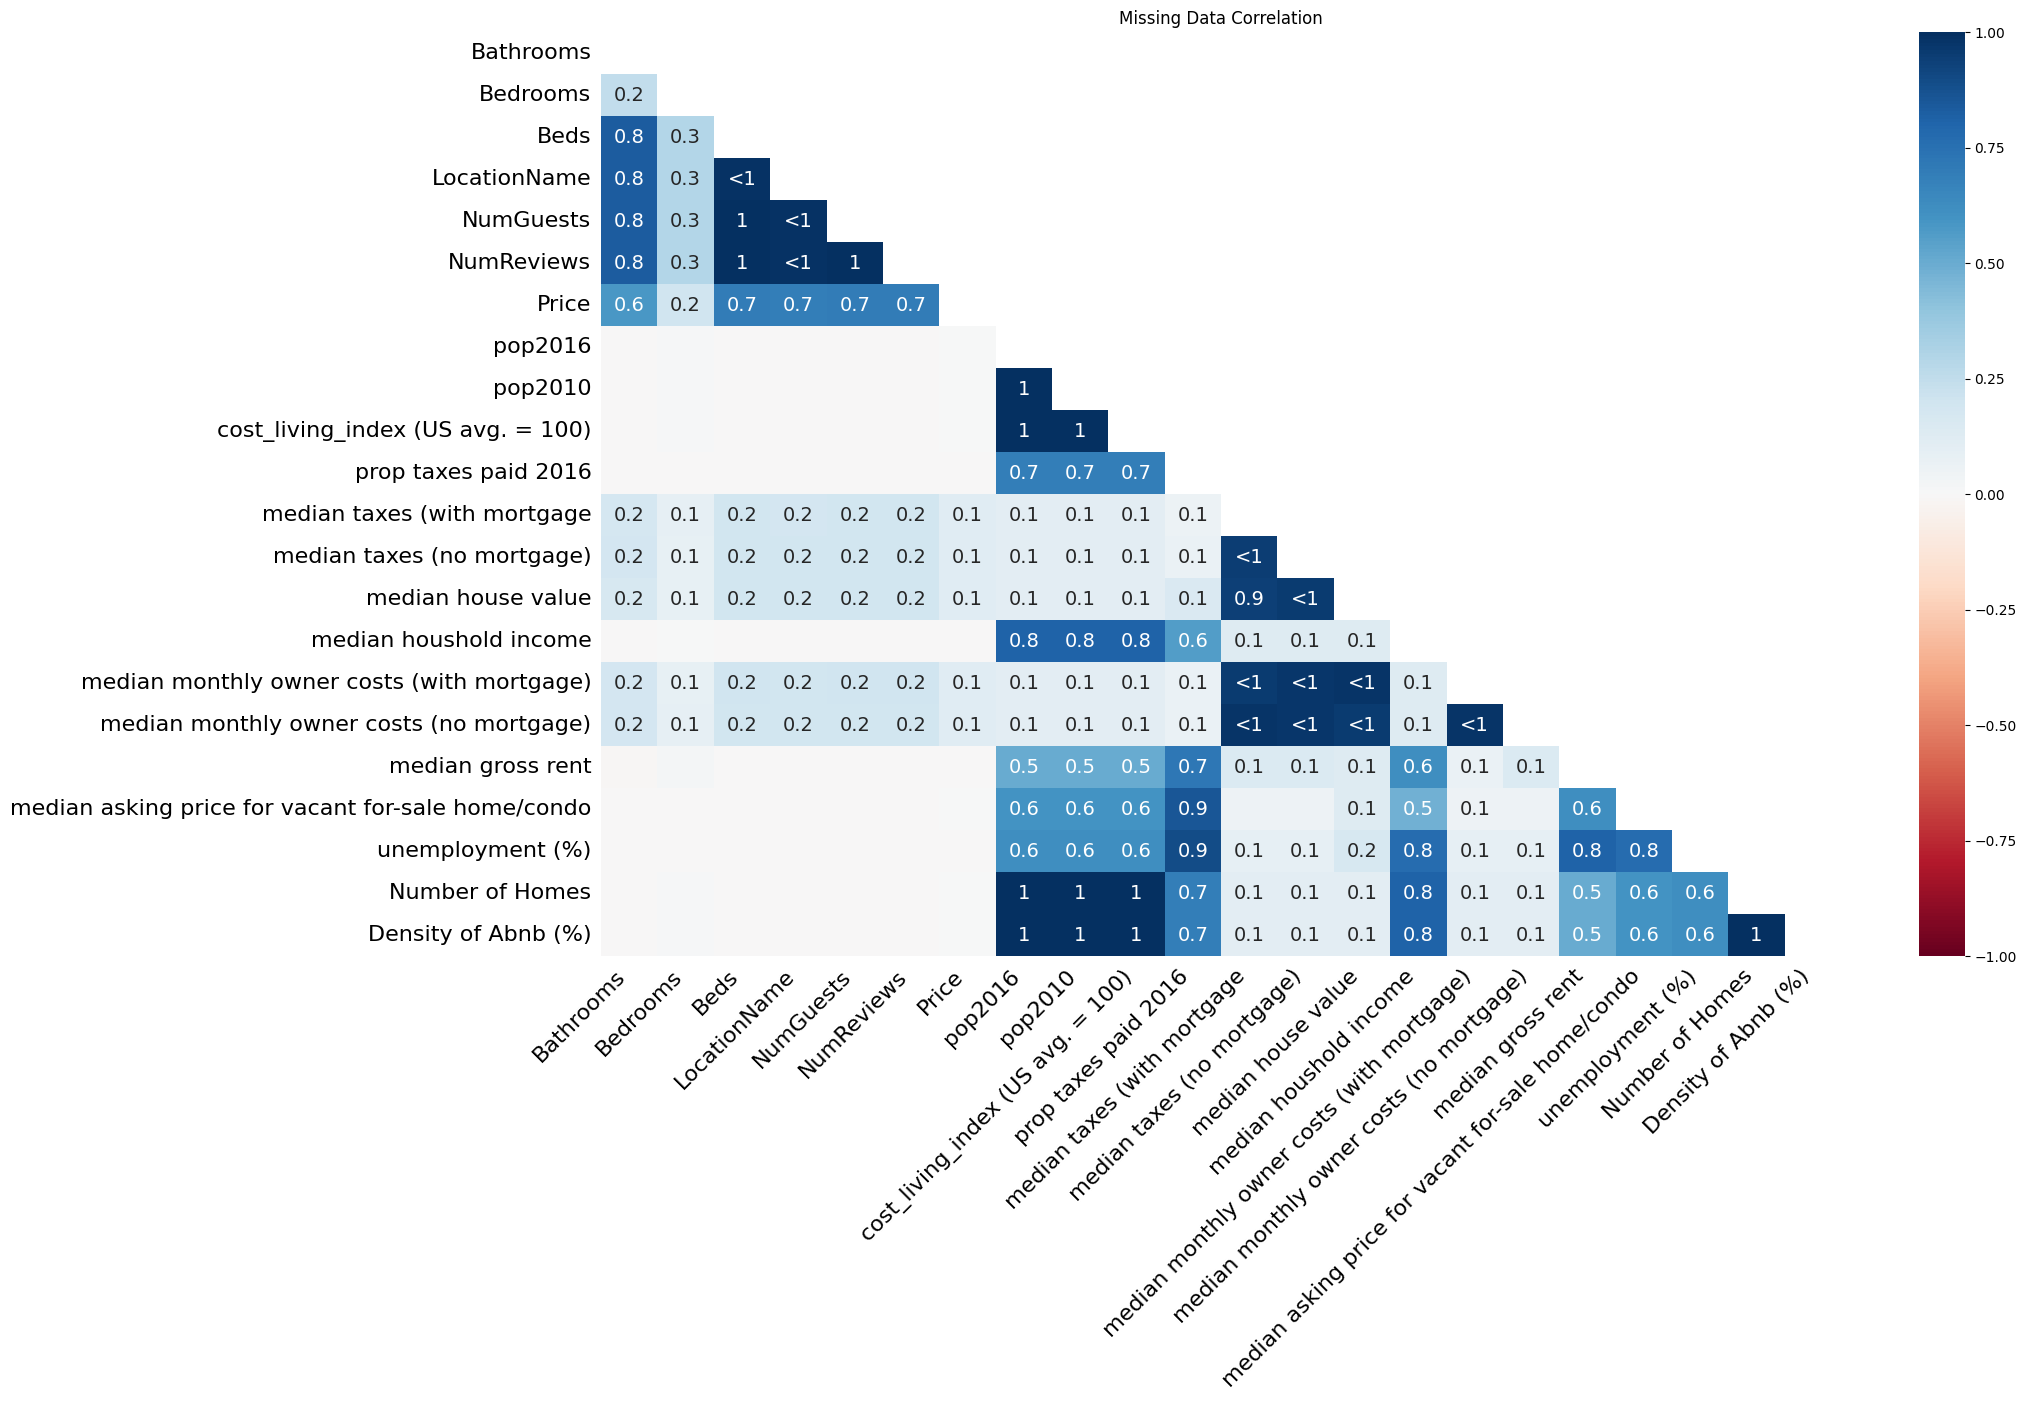

In [57]:
msno.heatmap(data)
plt.title("Missing Data Correlation")
plt.show()

In [58]:
# Handle missing data (example: imputation for numerical and categorical columns)
numerical_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(exclude=[np.number]).columns

# Imputation strategies
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])



---



- Explore outliers and duplicated, and how would you handle them (there’s no one true solution but you
must explain your reasons in a separate markdown), Briefly describe your step and findings.

### Outlier Analysis
- Outliers will be identified using the Interquartile Range (IQR) method.
- Extreme values will be capped to reduce their influence on analysis.
"""

In [59]:
# Outlier handling for 'Price'
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Price'] < lower_bound) | (data['Price'] > upper_bound)]
print(f"Number of outliers in 'Price': {len(outliers)}")

Number of outliers in 'Price': 2483


In [60]:
# Cap outliers
data['Price'] = np.where(data['Price'] < lower_bound, lower_bound,
                         np.where(data['Price'] > upper_bound, upper_bound, data['Price']))

In [61]:
# Duplicates Analysis
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates
data = data.drop_duplicates()

Number of duplicate rows: 4266




---



(3) (15 marks) For the 4 questions you proposed in the first subquestion, what are the null hypothesis
and alternative hypothesis? Perform statistical test to answer your question and report your findings.

### Hypothesis Testing:

#### Question 1: Price vs. Population Density:
- Null Hypothesis: The average price and population density do not significantly correlate.
- Alternative Hypothesis: The average price and population density are significantly correlated.

In [62]:
correlation_result = stats.pearsonr(data['pop_density (people per mile)'], data['Price'])
print("Correlation Test Result for Population Density vs. Price:", correlation_result)

Correlation Test Result for Population Density vs. Price: PearsonRResult(statistic=0.00865278420080556, pvalue=0.1414527325389911)


### Question 2: The Ratio of 5-Star Ratings to the Unemployment Rate

- It is hypothesized that the percentage of 5-star ratings is not considerably impacted by the unemployment rate.

- Another theory is that the percentage of 5-star reviews is strongly impacted by the unemployment rate.


In [63]:
# Convert Rating column to numeric, coercing errors into NaN
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Remove rows where Rating is NaN
low_unemployment = data[data['unemployment (%)'] <= data['unemployment (%)'].median()]['Rating'].dropna()
high_unemployment = data[data['unemployment (%)'] > data['unemployment (%)'].median()]['Rating'].dropna()

# Perform the t-test
ttest_result = stats.ttest_ind(low_unemployment, high_unemployment)
print("T-Test Result for Unemployment Rate vs. 5-Star Ratings:", ttest_result)

T-Test Result for Unemployment Rate vs. 5-Star Ratings: TtestResult(statistic=nan, pvalue=nan, df=nan)


<ipython-input-63-40d4efffd639>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')


#### Question 3: Price vs. Bedrooms:
- Null Hypothesis: The daily price is not much impacted by the number of bedrooms.

- Alternative Hypothesis: The daily cost is highly influenced by the number of bedrooms.


In [64]:
grouped = [data[data['Bedrooms'] == i]['Price'] for i in data['Bedrooms'].unique()]
anova_result = stats.f_oneway(*grouped)
print("ANOVA Test Result for Bedrooms vs. Price:", anova_result)

ANOVA Test Result for Bedrooms vs. Price: F_onewayResult(statistic=1804.6818795925049, pvalue=0.0)


#### Question 4: Average Price vs. Median Household Income:
- Null Hypothesis: The average price and median household income do not significantly correlate.
- Alternative Hypothesis: The average price and median household income are significantly correlated.


In [ ]:
correlation_result_income = stats.pearsonr(data['median houshold income'], data['Price'])
print("Correlation Test Result for Median Household Income vs. Average Price:", correlation_result_income)




---



(4) (10 marks) Make some visualizations about your columns and explain what did you got from each
visualization.

## Visualization

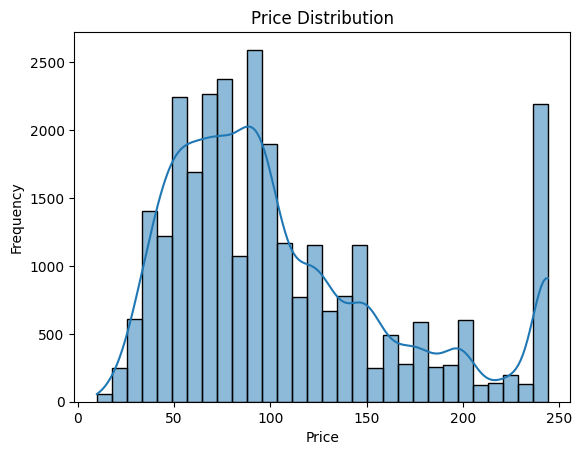

In [65]:
# Price Distribution
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

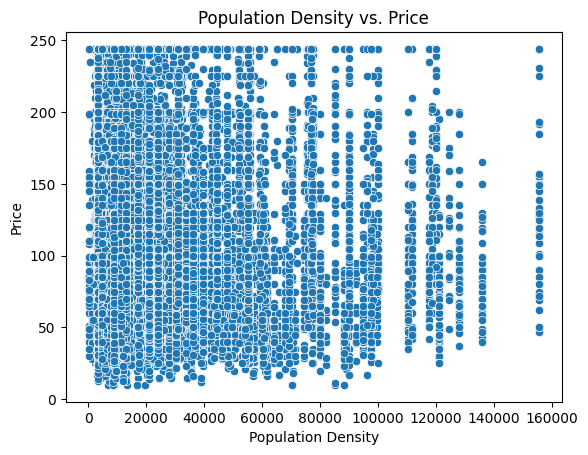

In [86]:
# Population Density vs. Price
# plt.figure(figsize=(20, 14))
sns.scatterplot(x='pop_density (people per mile)', y='Price', data=data)
plt.title('Population Density vs. Price')
plt.xlabel('Population Density')
plt.ylabel('Price')
plt.show()

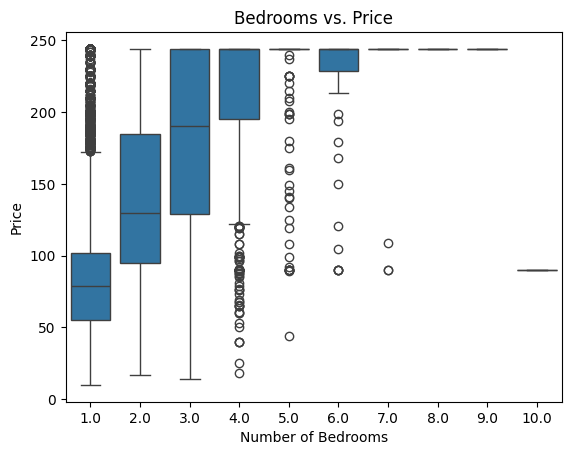

In [85]:
# Bedrooms vs. Price
# plt.figure(figsize=(14, 10))
sns.boxplot(x='Bedrooms', y='Price', data=data)
plt.title('Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

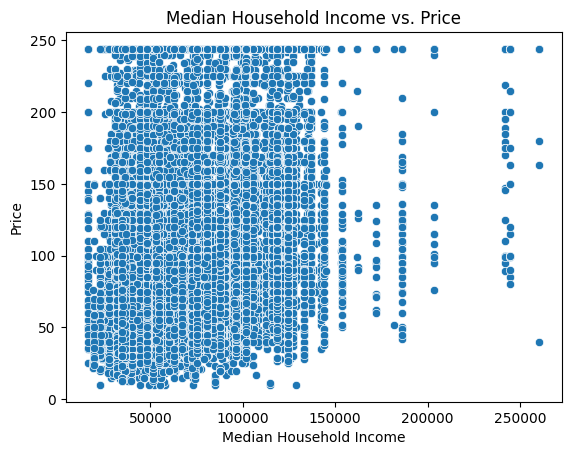

In [84]:
# Median Household Income vs. Price
# plt.figure(figsize=(18, 14))
sns.scatterplot(x='median houshold income', y='Price', data=data)
plt.title('Median Household Income vs. Price')
plt.xlabel('Median Household Income')
plt.ylabel('Price')
plt.show()



---



(5) (5 marks) Briefly describe your feature engineering plan and code it (at least 3 columns should be
involved).

### Plan for Feature Engineering
1. Divide `Price` by `NumGuests` to create a `Price_per_Guest` feature.

2. Depending on whether `cost_living_index` is greater than the median, create a binary `High_Cost_Living` column.

3. Determine the average number of reviews for listings classified by `zipcode` and add `Avg_Reviews_Per_Zipcode`.


In [83]:
data['Price_per_Guest'] = data['Price'] / data['NumGuests']

median_cost_living = data['cost_living_index (US avg. = 100)'].median()
data['High_Cost_Living'] = data['cost_living_index (US avg. = 100)'] > median_cost_living
data['Avg_Reviews_Per_Zipcode'] = data.groupby('zipcode')['NumReviews'].transform('mean')

# Save the processed dataset
data.to_csv('processed_airbnb_data.csv', index=False)
print("Feature engineering completed and saved.")

<ipython-input-83-d12e796f8414>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price_per_Guest'] = data['Price'] / data['NumGuests']
<ipython-input-83-d12e796f8414>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['High_Cost_Living'] = data['cost_living_index (US avg. = 100)'] > median_cost_living
<ipython-input-83-d12e796f8414>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Feature engineering completed and saved.
